<a href="https://colab.research.google.com/github/Ruiz0430/Pokemon-analysis/blob/main/pokemon_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pokemon dataset analysis

**Daniel Ruiz**

**May 23rd 2025**

Analysis of the pokemon.csv dataset provided by kaggle.com







# 1. Loading & Analyzing Pokemon Data

In [19]:
import pandas as pd

# load the csv file dataframe
df = pd.read_csv("/content/drive/MyDrive/pokemon.csv")

# Display first 5 rows
print("First 5 Pokémon:")
print(df.head())

# Show basic stats
print("\nSummary statistics:")
print(df.describe())

# Find Pokémon with Attack > 50
strong_attack = df[df["Attack"] > 50]
print("\nPokémon with strong Attack:")
print(strong_attack[["Name", "Attack"]])

# Group by Type1 and get average stats
print("\nAverage stats by Type1:")
print(df.groupby("Type 1")[["HP", "Attack", "Defense", "Speed"]].mean())


First 5 Pokémon:
   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  

Summary statistics:
                #      Total          HP      Attack     Defense     Sp. Atk  \
count  800.000000  800.00000  800.000000  800.000000  800.000000  800.000000   
mean   362.813750  435.10250   69.258750   79

# 2. Interactive Pokemon Data Dashboard

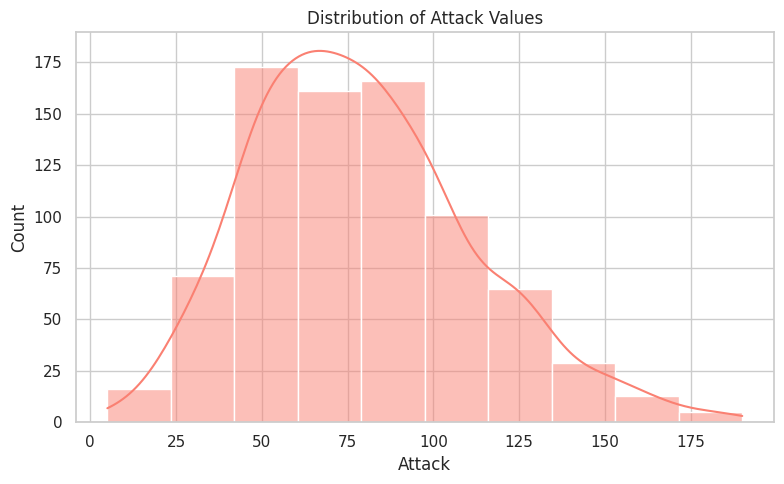

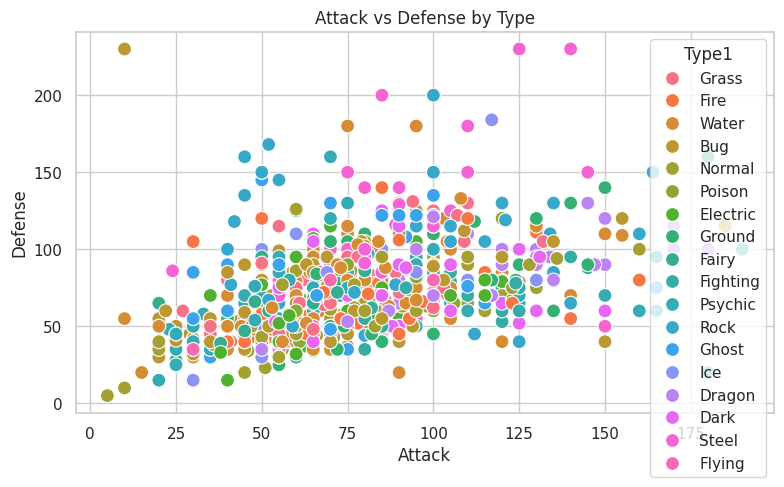

<ipython-input-11-36d67dd2eeee>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Type 1", y="Speed", data=avg_speed, palette="viridis")


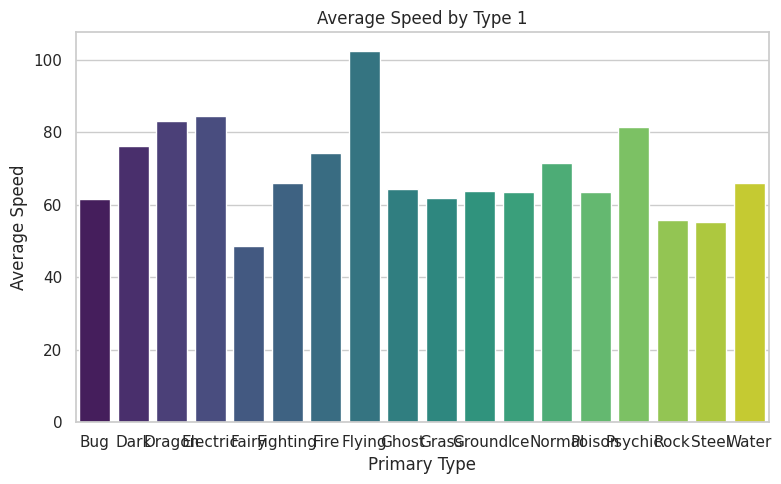

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataframe
df = pd.read_csv("/content/drive/MyDrive/pokemon.csv")

# --- Basic Stats Distribution ---
sns.set(style="whitegrid")

# 1. Distribution of Attack Values
plt.figure(figsize=(8, 5))
sns.histplot(df["Attack"], bins=10, kde=True, color="salmon")
plt.title("Distribution of Attack Values")
plt.xlabel("Attack")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 2. Scatter plot: Attack vs Defense
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Attack", y="Defense", hue="Type 1", data=df, s=100)
plt.title("Attack vs Defense by Type")
plt.xlabel("Attack")
plt.ylabel("Defense")
plt.legend(title="Type1")
plt.tight_layout()
plt.show()

# 3. Bar Plot: Average Speed by Type
plt.figure(figsize=(8, 5))
avg_speed = df.groupby("Type 1")["Speed"].mean().reset_index()
sns.barplot(x="Type 1", y="Speed", data=avg_speed, palette="viridis")
plt.title("Average Speed by Type 1")
plt.xlabel("Primary Type")
plt.ylabel("Average Speed")
plt.tight_layout()
plt.show()


# 3. Visualizing Pokemon Stats with Plotly

In [18]:
import pandas as pd
import plotly.express as px

# Load dataframe
df = pd.read_csv("/content/drive/MyDrive/pokemon.csv")

# clean and filter data
df = df.dropna(subset=["Attack", "Defense", "Speed", "Type 1"])

# 1. Interactive Scatter Plot: Attack vs Defense
fig1 = px.scatter(
    df,
    x="Attack",
    y="Defense",
    color="Type 1",
    hover_data=["Name", "Speed"],
    title="Attack vs Defense by Type",
)
fig1.show()

# 2. Interactive Histogram: Attack Distribution
fig2 = px.histogram(
    df,
    x="Attack",
    nbins=20,
    title="Distribution of Attack Values",
    color="Type 1",
)
fig2.show()

# 3. Interactive Bar Chart: Average Speed by Type1
avg_speed = df.groupby("Type 1", as_index=False)["Speed"].mean()
fig3 = px.bar(
    avg_speed,
    x="Type 1",
    y="Speed",
    title="Average Speed by Type1",
    color="Type 1",
)
fig3.show()
